In [16]:
import os
import numpy as np
import pandas as pd
import tkinter as tk
import tensorflow as tf
from PIL import Image, ImageTk
from tkinter import filedialog
import matplotlib.pyplot as plt
from tkinter.filedialog import askopenfile
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array

In [6]:
model_marine_classification = load_model('./models/marine_classification.h5')
model_marine_grading_fish = load_model('./models/marine_grading_fish.h5')
model_marine_grading_shrimp = load_model('./models/marine_grading_shrimp.h5')

In [24]:
def upload_file():
    global img, predict_path
    f_types = [('Jpg Files', '*.jpg'), 
               ('Png Files', '*.png'), 
               ('All Files', '*.*')]
    filename = filedialog.askopenfilename(filetypes=f_types)
    predict_path = filename
    img = ImageTk.PhotoImage(file=filename)
    my_w.destroy()

my_w = tk.Tk()
my_w.geometry("400x300")  
my_w.title('upload marine product image')
my_font1=('times', 18, 'bold')
l1 = tk.Label(my_w,text='upload your marine product image',width=30,font=my_font1)  
l1.grid(row=1,column=1)
b1 = tk.Button(my_w, text='Upload File', 
   width=20,command = lambda:upload_file())
b1.grid(row=2,column=1) 

my_w.mainloop()

In [25]:
img = load_img(predict_path, target_size=(150, 150))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255

1/1 [==============================] - 1s 895ms/step
classification class:  Ikan
predicted class:  B


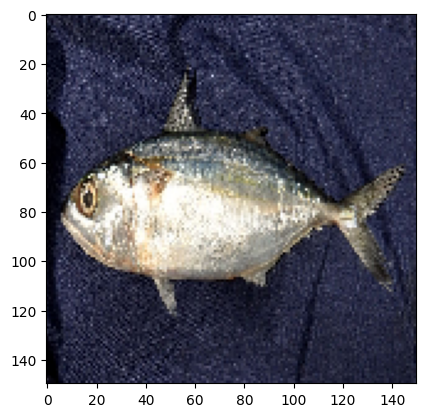

In [26]:
classificationResult = model_marine_classification.predict(x, batch_size=1)
class_list = ['Ikan', 'Udang']
classification_class = class_list[np.argmax(classificationResult[0])]
predicted_class = None

if classification_class == 'Ikan':
    classes = model_marine_grading_fish.predict(x, batch_size=1)
    class_list = ['A', 'B', 'C']
    predicted_class = class_list[np.argmax(classes[0])]
elif classification_class == 'Udang':
    classes = model_marine_grading_shrimp.predict(x, batch_size=1)
    class_list = ['A', 'B', 'C']
    predicted_class = class_list[np.argmax(classes[0])]

print('classification class: ', classification_class)
print('predicted class: ', predicted_class)
imgplot = plt.imshow(img)